In [73]:
from __future__ import print_function

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import datetime
import glob

In [78]:
classes_list = {'abnormal':0, 'normal':1}
def load_data(train_path):
    x_train_list=[]
    y_train_list=[]
    
    images = glob.glob(train_path+"/**/*.jpg")
    
    for i,path in enumerate(images):
        x_train_list.append(path)
        label = (path.split("/"))[2]
        label_place = classes_list[label]
        y_train_list.append(label_place)
                
    return x_train_list, y_train_list

In [79]:
train_path = "datasets/train2"

In [80]:
def kmeans(ori_img):
    Z = ori_img.reshape((-1,3))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 4, 1.0)
    K = 2
    ret,label,center=cv2.kmeans(Z, K, None, criteria, 4,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((ori_img.shape))
    np.unique(res2[:,:,1])
    temp = res2
    temp[:,:,0][res2[:,:,0] > np.unique(res2[:,:,0])[0]] = 255
    temp[:,:,1][res2[:,:,1] > np.unique(res2[:,:,1])[0]] = 255
    temp[:,:,2][res2[:,:,2] > np.unique(res2[:,:,2])[0]] = 255
    newx = ori_img
    newx[:,:,0][temp[:,:,0]== 255] = 255
    newx[:,:,1][temp[:,:,1]== 255] = 255
    newx[:,:,2][temp[:,:,2]== 255] = 255
    return newx

In [94]:
x_train_list, y_train_list = load_data(train_path)
hstack=np.hstack((np.expand_dims(y_train_list, axis=1),np.expand_dims(x_train_list, axis=1)))
s = pd.DataFrame(hstack,columns = ["name", "path"])
# s["name"] = s["name"].map(classes_list)

y_train = np.array(s["name"])


x_train = []
for i,each in enumerate(x_train_list):
    try:
        img = cv2.imread(each)
        img=img[:,:,::-1]
        img = cv2.resize(img, (224,224))
        img = kmeans(img)
        x_train.append(img)
    except:
        y_train = np.delete(y_train,i)
        continue
    
x_train = np.array(x_train)

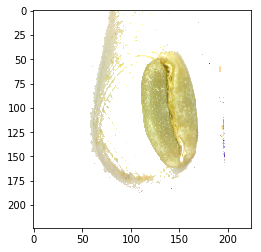

In [95]:
t = 680
plt.imshow(x_train[t])
for 
    filename = os.path.join('.', 
                            'kmeans_{}.jpg'.format(datetime.datetime.today().strftime(
                                                       '%Y-%m-%d_%M_%S')))

    plt.savefig(filename)

In [97]:
s.iloc[t,1]

'datasets/train2/normal/Image 2018_10_11_154555.104.jpg'

In [8]:
Z = x_train[t].reshape((-1,3))
Z = np.float32(Z)

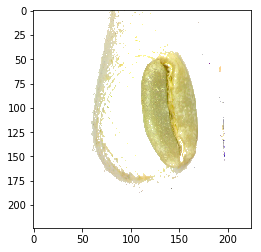

In [9]:
plt.imshow(x_train[t])

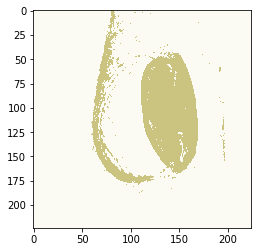

In [51]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 4, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z, K, None, criteria, 4,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((x_train[t].shape))
plt.imshow(res2)

In [52]:
np.unique(res2[:,:,1])

array([195, 250], dtype=uint8)

In [53]:
temp = res2

In [54]:
temp[:,:,0][res2[:,:,0] > np.unique(res2[:,:,0])[0]] = 255

temp[:,:,1][res2[:,:,1] > np.unique(res2[:,:,1])[0]] = 255
temp[:,:,2][res2[:,:,2] > np.unique(res2[:,:,2])[0]] = 255

In [55]:
#np.unique(temp[:,:,0])

In [69]:
newx = x_train[t]

(224, 224, 3)

In [57]:
newx[:,:,0][temp[:,:,0]== 255] = 255
newx[:,:,1][temp[:,:,1]== 255] = 255
newx[:,:,2][temp[:,:,2]== 255] = 255

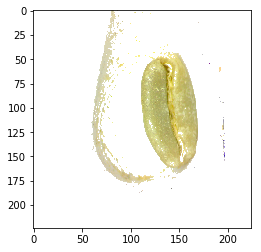

In [58]:
plt.imshow(newx)

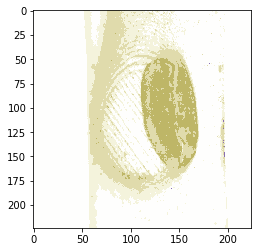

In [64]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 4, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z, K, None, criteria, 4,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((newx.shape))
plt.imshow(res2)

In [65]:
newx[:,:,0][res2[:,:,0] >= np.unique(res2[:,:,0])[-2]] = 255
newx[:,:,1][temp[:,:,1] >= np.unique(res2[:,:,1])[-2]] = 255
newx[:,:,2][temp[:,:,2] >= np.unique(res2[:,:,2])[-2]] = 255

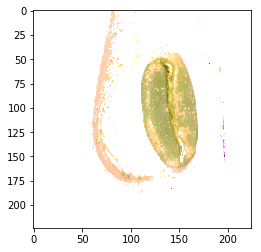

In [66]:
plt.imshow(newx)

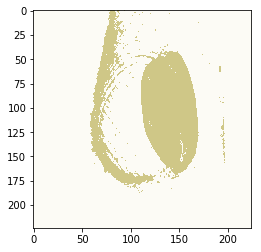

In [67]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 4, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z, K, None, criteria, 4,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((newx.shape))
plt.imshow(res2)

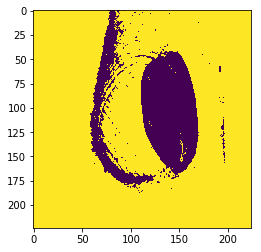

In [68]:
plt.imshow(res2[:,:,1])